<a href="https://www.kaggle.com/layusmen/superstore-sales-analysis?scriptVersionId=88494599" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import cufflinks as cf

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.5.0


In [4]:
# For Notebooks
init_notebook_mode(connected=True)

In [5]:
# For offline use
cf.go_offline()

In [6]:
sales = pd.read_csv('../input/sales-forecasting/train.csv')

In [7]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
sales.shape

(9800, 18)

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

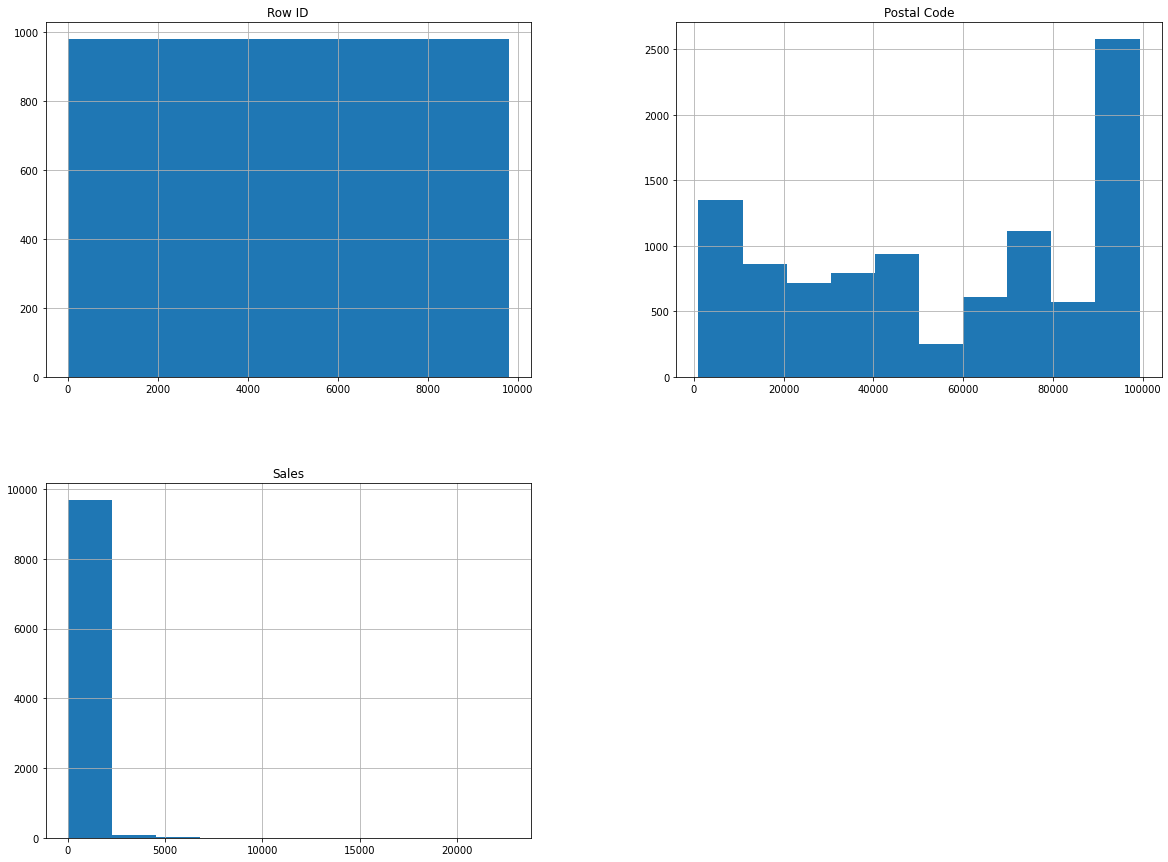

In [10]:
sales.hist(figsize = (20,15))
plt.show()

In [11]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [12]:
sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

<h1>Total Sales Trend</h1>

In [13]:
sales.dropna(inplace = True)
sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [14]:
#Convert Order Date to Datetime
sales['Order Date']= pd.to_datetime(sales['Order Date'])

#Create a Month Year Column

sales['Year Month'] = sales['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

<h2>Convert Order Date to Datetime</h2>

In [15]:
sales_trend = pd.DataFrame(sales.groupby('Year Month').sum()['Sales'].reset_index())
sales_trend

,Year Month,Sales
0,2015-01,28828.2540
1,2015-02,12588.4840
2,2015-03,54027.6920
3,2015-04,24710.0160
4,2015-05,29520.4900
5,2015-06,29181.3346
6,2015-07,35194.5580
7,2015-08,37349.2655
8,2015-09,65956.3998
9,2015-10,34561.9470


<h2>Plotting the graph </h2>
 Two ways to plot the graph: 
        1. use matplotlib [line and area]
        2. use plotly


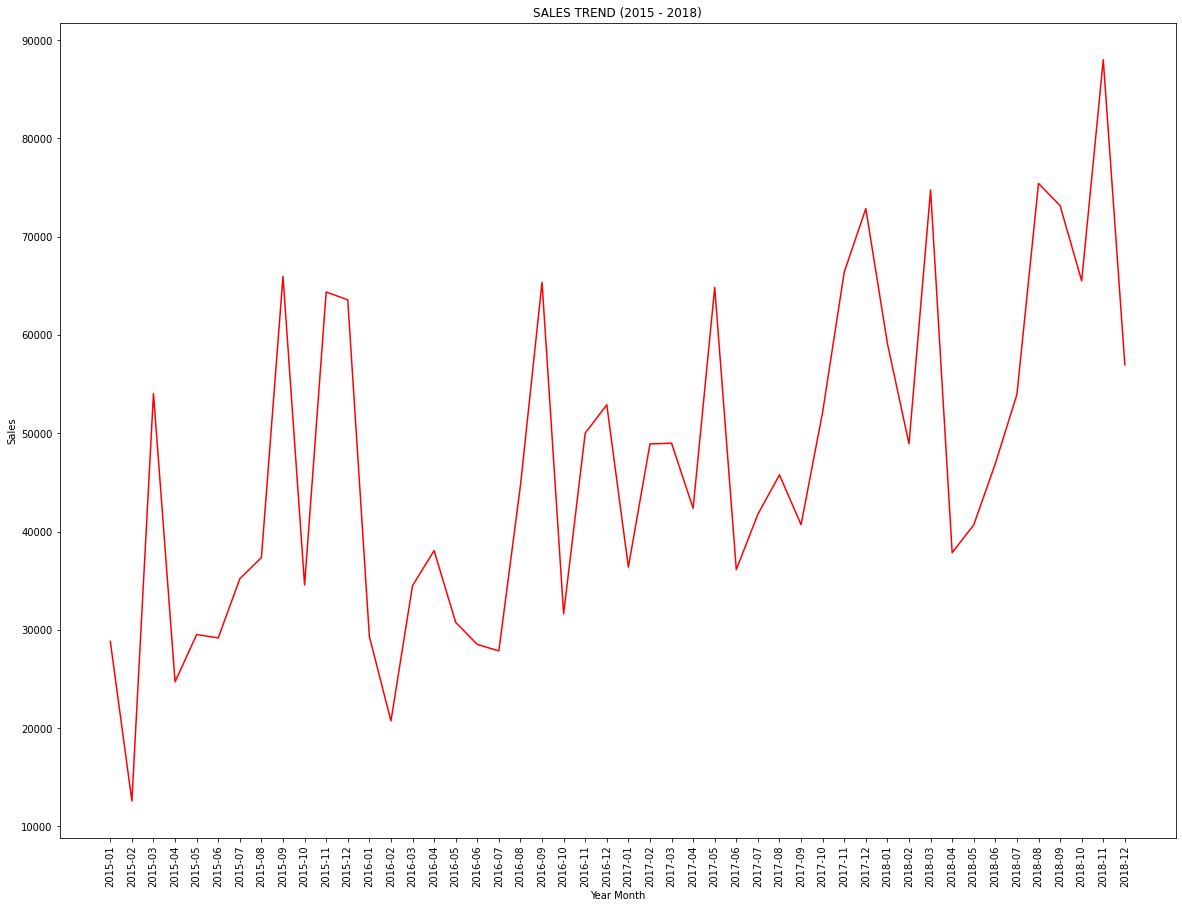

In [16]:
plt.figure( figsize =(20,15))
plt.xticks(rotation = 'vertical', size =10)
plt.plot(sales_trend['Year Month'], sales_trend['Sales'], color = 'red')
plt.title('SALES TREND (2015 - 2018)')
plt.ylabel('Sales')
plt.xlabel('Year Month')
plt.show()

In [17]:
fig = px.line(sales_trend, x="Year Month", y="Sales",title = 'SALES TREND (2015 - 2018)', width=2000, height=800)
fig.show()

In [18]:
fig = px.area(y=sales_trend['Sales'],x= sales_trend['Year Month'], title = 'SALES TREND (2015 - 2018)',labels={'x':'Year Month','y':'Sales'}, width=2000, height=800)
fig.update_layout(showlegend = False)
fig.show()


<h1> Most Selling Products? </h1>

In [19]:
most_product = sales['Product Name'].value_counts().head(20)
most_product

Staple envelope                                               47
Staples                                                       46
Easy-staple paper                                             44
Avery Non-Stick Binders                                       20
Staples in misc. colors                                       18
Staple remover                                                18
KI Adjustable-Height Table                                    17
Storex Dura Pro Binders                                       17
Staple-based wall hangings                                    16
Situations Contoured Folding Chairs, 4/Set                    15
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling     15
Eldon Wave Desk Accessories                                   14
Global Wood Trimmed Manager's Task Chair, Khaki               14
GBC Premium Transparent Covers with Diagonal Lined Pattern    14
Global High-Back Leather Tilter, Burgundy                     14
Hot File 7-Pocket, Floor 

In [20]:
most_product.iplot(title = 'MOST SELLING PRODUCTS', xTitle = "Products",yTitle = "Value Counts")

<h1>Top 20 Products by Amount of Sales</h1>

In [21]:
product_sales = pd.DataFrame(sales.groupby('Product Name').sum()['Sales'])
product_sales = product_sales.sort_values('Sales', ascending = False)
product_sales[:20]

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.8240
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.3840
Cisco TelePresence System EX90 Videoconferencing Unit,22638.4800
HON 5400 Series Task Chairs for Big and Tall,21870.5760
GBC DocuBind TL300 Electric Binding System,19823.4790
GBC Ibimaster 500 Manual ProClick Binding System,19024.5000
Hewlett Packard LaserJet 3310 Copier,18839.6860
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.8950
GBC DocuBind P400 Electric Binding System,17965.0680


In [22]:
product_sales[:20].iplot(kind='bar',xTitle='Products',yTitle='Amount of Sales',title='Top 20 Product by Amount of Sales')

<h1> Which is the most preferred Shipping Mode by Sales? </h1>

In [23]:
preferred_shipping = sales.groupby('Ship Mode').sum()['Sales']
preferred_shipping

Ship Mode
First Class       3.455723e+05
Same Day          1.252190e+05
Second Class      4.491990e+05
Standard Class    1.332617e+06
Name: Sales, dtype: float64

In [24]:
preferred_shipping.iplot(kind = 'bar', xTitle='Shipping Modes',yTitle='Amount Sold',title= 'Preferred Shipping Modes')

Numbers of Product Sold by Category

In [25]:
cat= sales.groupby(sales['Category']).count()['Sales']
cat

Category
Furniture          2076
Office Supplies    5903
Technology         1810
Name: Sales, dtype: int64

In [26]:
cat.iplot(kind='scatter',xTitle='Categories',yTitle='Amount Sold',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

Numbers of Prodof Products Sold

In [27]:
sub_cat= sales.groupby(sales['Sub-Category']).count()['Sales']
sub_cat

Sub-Category
Accessories     754
Appliances      458
Art             784
Binders        1492
Bookcases       225
Chairs          606
Copiers          66
Envelopes       247
Fasteners       214
Furnishings     931
Labels          357
Machines        115
Paper          1336
Phones          875
Storage         831
Supplies        184
Tables          314
Name: Sales, dtype: int64

In [28]:
sub_cat.iplot(kind='scatter',xTitle='Sub-Categories',yTitle='Number Sold',title='Numbers of Product Sold/ Sub-Category',
                         colorscale='-greens',fill=True)

Profitable Categories

In [29]:
cat_sales= sales.groupby(sales['Category']).sum()['Sales'].reset_index()
cat_sales= cat_sales.sort_values('Sales', ascending = False)
cat_sales

,Category,Sales
2,Technology,825856.1130
0,Furniture,723538.4757
1,Office Supplies,703212.8240


In [30]:
cat_sales.iplot(kind='scatter', x= 'Sales', y ='Category',
                xTitle='Number Sold',yTitle='Categories',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

Total Sales by Sub-Category

In [31]:
sub_sales= sales.groupby(sales['Sub-Category']).sum()['Sales'].reset_index()
sub_sales = sub_sales.sort_values('Sales', ascending = False)
sub_sales

,Sub-Category,Sales
13,Phones,326487.6980
5,Chairs,322107.5310
14,Storage,217779.1020
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,163881.6900
6,Copiers,146248.0940
4,Bookcases,109408.2987
1,Appliances,104075.4630


In [32]:
sub_sales.iplot(kind='scatter', x= 'Sales', y ='Sub-Category',
                xTitle='Number Sold',yTitle='Categories',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

<h1> Top 20 Cities With Highest Sales </h1>

In [33]:

city_count= sales['City'].value_counts()
city_count = city_count.sort_values(ascending = False)
city_count.head(20)

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Dallas           156
Jacksonville     125
Detroit          115
Newark            92
Jackson           82
Columbia          81
Richmond          81
Aurora            68
Phoenix           63
Arlington         60
Name: City, dtype: int64

In [34]:
city_count.head(20).iplot(kind='line',xTitle='City',yTitle='Number of Sales',title='Top 20 Cities With Highest Sales',
                         filename='Cufflinks - Bestfit Line Chart')

<h1>Top 20 Sales by City</h1>

In [35]:
city_sales= sales.groupby(sales['City']).sum()['Sales'].reset_index()
city_sales = city_sales.sort_values('Sales', ascending = False)
city_sales.head(10)

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


In [36]:
city_sales.head(20).iplot(kind='scatter',x ='Sales', y= 'City',
                xTitle='Sales',yTitle='Cities',title='Top 20 Cities With Highest Sales',
                         colorscale='-blues',fill=True)